<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Загрузка-и-первичный-просмотр-данных" data-toc-modified-id="Загрузка-и-первичный-просмотр-данных-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Загрузка и первичный просмотр данных</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Предобработка данных</a></span><ul class="toc-item"><li><span><a href="#Обработка-ошибочных-значений" data-toc-modified-id="Обработка-ошибочных-значений-1.2.1"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>Обработка ошибочных значений</a></span></li><li><span><a href="#Обработка-пропущенных-значений" data-toc-modified-id="Обработка-пропущенных-значений-1.2.2"><span class="toc-item-num">1.2.2&nbsp;&nbsp;</span>Обработка пропущенных значений</a></span></li></ul></li><li><span><a href="#Преобразование-типов" data-toc-modified-id="Преобразование-типов-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Преобразование типов</a></span></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span></li><li><span><a href="#Подготовка-признаков" data-toc-modified-id="Подготовка-признаков-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Подготовка признаков</a></span></li><li><span><a href="#Создание-обучающей-и-тестовой-выборок" data-toc-modified-id="Создание-обучающей-и-тестовой-выборок-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Создание обучающей и тестовой выборок</a></span></li></ul></li><li><span><a href="#Обучение-моделей" data-toc-modified-id="Обучение-моделей-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Обучение моделей</a></span><ul class="toc-item"><li><span><a href="#LinearRegression" data-toc-modified-id="LinearRegression-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>LinearRegression</a></span></li><li><span><a href="#ElasticNet" data-toc-modified-id="ElasticNet-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>ElasticNet</a></span></li><li><span><a href="#RandomForestRegressor" data-toc-modified-id="RandomForestRegressor-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>RandomForestRegressor</a></span></li><li><span><a href="#LightGBM-Regressor" data-toc-modified-id="LightGBM-Regressor-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>LightGBM Regressor</a></span></li><li><span><a href="#DummyRegressor" data-toc-modified-id="DummyRegressor-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>DummyRegressor</a></span></li></ul></li><li><span><a href="#Анализ-моделей" data-toc-modified-id="Анализ-моделей-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Анализ моделей</a></span></li></ul></div>

# Определение стоимости автомобилей

Предоставлены исторические данные о продажах автомобилей с пробегом: технические характеристики, комплектации и цены автомобилей. 

**Цель**: Нужно построить модель для определения стоимости автомобиля.

**Целевой признак**: Price — цена (евро)

Заказчику важны:

- качество предсказания;
- скорость предсказания;
- время обучения.

# Описание данных

- DateCrawled — дата скачивания анкеты из базы
- VehicleType — тип автомобильного кузова
- RegistrationYear — год регистрации автомобиля
- Gearbox — тип коробки передач
- Power — мощность (л. с.)
- Model — модель автомобиля
- Kilometer — пробег (км)
- RegistrationMonth — месяц регистрации автомобиля
- FuelType — тип топлива
- Brand — марка автомобиля
- NotRepaired — была машина в ремонте или нет
- DateCreated — дата создания анкеты
- NumberOfPictures — количество фотографий автомобиля
- PostalCode — почтовый индекс владельца анкеты (пользователя)
- LastSeen — дата последней активности пользователя
- Price — цена (евро)

## Подготовка данных

### Загрузка и первичный просмотр данных

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import lightgbm as lgb

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression, ElasticNet, LassoCV

from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, train_test_split, cross_validate
from sklearn.dummy import DummyRegressor
from sklearn.feature_selection import RFE

In [2]:
warnings.filterwarnings('ignore')
sns.set_style('whitegrid')
pd.set_option('display.float_format', '{:.3f}'.format)
pd.set_option('display.max_rows', 40)

In [3]:
autos = pd.read_csv('/datasets/autos.csv')

In [4]:
autos.head(1)

,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,RegistrationMonth,FuelType,Brand,NotRepaired,DateCreated,NumberOfPictures,PostalCode,LastSeen
0,2016-03-24 11:52:17,480,NaN,1993,manual,0,golf,150000,0,petrol,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57


In [5]:
autos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354369 entries, 0 to 354368
Data columns (total 16 columns):
DateCrawled          354369 non-null object
Price                354369 non-null int64
VehicleType          316879 non-null object
RegistrationYear     354369 non-null int64
Gearbox              334536 non-null object
Power                354369 non-null int64
Model                334664 non-null object
Kilometer            354369 non-null int64
RegistrationMonth    354369 non-null int64
FuelType             321474 non-null object
Brand                354369 non-null object
NotRepaired          283215 non-null object
DateCreated          354369 non-null object
NumberOfPictures     354369 non-null int64
PostalCode           354369 non-null int64
LastSeen             354369 non-null object
dtypes: int64(7), object(9)
memory usage: 43.3+ MB


In [6]:
autos.describe()

,Price,RegistrationYear,Power,Kilometer,RegistrationMonth,NumberOfPictures,PostalCode
count,354369.000,354369.000,354369.000,354369.000,354369.000,354369.000,354369.000
mean,4416.657,2004.234,110.094,128211.173,5.715,0.000,50508.689
std,4514.159,90.228,189.850,37905.342,3.726,0.000,25783.096
min,0.000,1000.000,0.000,5000.000,0.000,0.000,1067.000
25%,1050.000,1999.000,69.000,125000.000,3.000,0.000,30165.000
50%,2700.000,2003.000,105.000,150000.000,6.000,0.000,49413.000
75%,6400.000,2008.000,143.000,150000.000,9.000,0.000,71083.000
max,20000.000,9999.000,20000.000,150000.000,12.000,0.000,99998.000


In [7]:
autos.duplicated().sum()

4

In [8]:
autos.shape

(354369, 16)

In [9]:
autos.drop_duplicates(inplace=True)

In [10]:
autos.shape

(354365, 16)

In [11]:
autos.isna().mean()

DateCrawled         0.000
Price               0.000
VehicleType         0.106
RegistrationYear    0.000
Gearbox             0.056
Power               0.000
Model               0.056
Kilometer           0.000
RegistrationMonth   0.000
FuelType            0.093
Brand               0.000
NotRepaired         0.201
DateCreated         0.000
NumberOfPictures    0.000
PostalCode          0.000
LastSeen            0.000
dtype: float64

### Предобработка данных

#### Обработка ошибочных значений

- Категориальные признаки были проверены на предмет наличия дублирующих или ошибочных категорий
- Теперь обратимся к количественным переменным и посмотрим статистики по ним

In [12]:
autos.describe()

,Price,RegistrationYear,Power,Kilometer,RegistrationMonth,NumberOfPictures,PostalCode
count,354365.000,354365.000,354365.000,354365.000,354365.000,354365.000,354365.000
mean,4416.680,2004.234,110.094,128211.364,5.715,0.000,50508.504
std,4514.176,90.228,189.851,37905.084,3.726,0.000,25783.100
min,0.000,1000.000,0.000,5000.000,0.000,0.000,1067.000
25%,1050.000,1999.000,69.000,125000.000,3.000,0.000,30165.000
50%,2700.000,2003.000,105.000,150000.000,6.000,0.000,49413.000
75%,6400.000,2008.000,143.000,150000.000,9.000,0.000,71083.000
max,20000.000,9999.000,20000.000,150000.000,12.000,0.000,99998.000


**NumberOfPictures**

- Для начала уберем столбец NumberOfPictures, т.к. он полностью состоит из нулей

In [13]:
autos.drop('NumberOfPictures', axis=1, inplace=True)
autos.describe()

,Price,RegistrationYear,Power,Kilometer,RegistrationMonth,PostalCode
count,354365.000,354365.000,354365.000,354365.000,354365.000,354365.000
mean,4416.680,2004.234,110.094,128211.364,5.715,50508.504
std,4514.176,90.228,189.851,37905.084,3.726,25783.100
min,0.000,1000.000,0.000,5000.000,0.000,1067.000
25%,1050.000,1999.000,69.000,125000.000,3.000,30165.000
50%,2700.000,2003.000,105.000,150000.000,6.000,49413.000
75%,6400.000,2008.000,143.000,150000.000,9.000,71083.000
max,20000.000,9999.000,20000.000,150000.000,12.000,99998.000


**RegistrationYear**

- Перейдем к RegistrationYear
- Минимальное и максимальное значения явно ошибочные
- Посмотрим количество авто по годам и попытаемся поймать примерно начало появления реальных авто 

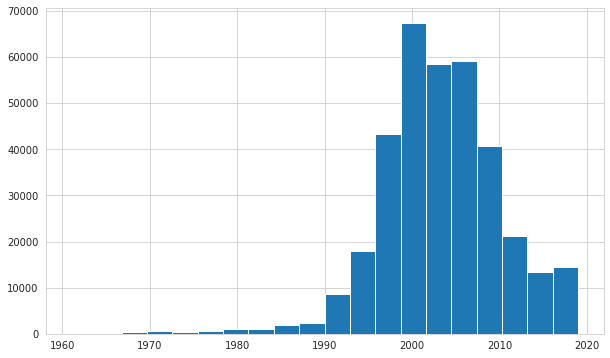

In [14]:
plt.figure(figsize=(10,6))
autos[(autos['RegistrationYear'] > 1960) & (autos['RegistrationYear'] < 2020)]['RegistrationYear'].hist(bins=20)
plt.show()

- Сложно восстановить дату регистрации авто, если она кажется неправильной, есть примеры, где дата регистрации на десятки лет раньше первого релиза модели
- Чтобы не потерять много данных, возьмем 1985 год как отсечку

In [15]:
autos[(autos['RegistrationYear'] > 2019) | (autos['RegistrationYear'] < 1985)]['RegistrationYear'].value_counts().sum()

5553

In [16]:
autos.shape[0]

354365

In [17]:
autos.drop(autos[(autos['RegistrationYear'] > 2019) | (autos['RegistrationYear'] < 1985)].index, inplace=True)

In [18]:
autos.shape[0]

348812

In [19]:
autos[(autos['RegistrationYear'] > 2016)]['RegistrationYear'].value_counts().sum()

14425

**Power**

- Теперь разберемся с Power
- Для начала посмотрим, как распределены значения мощности

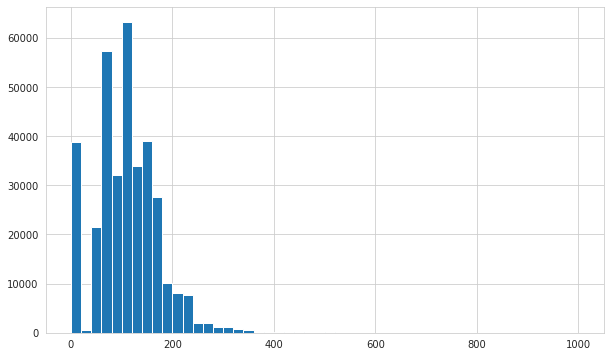

In [20]:
plt.figure(figsize=(10,6))
plt.hist(autos['Power'], bins=50, range = (0, 1000))
plt.show()

- У нас большое количество околонулевых значений мощности и небольшое количество значений мощности свыше 350 л.с.
- Околонулевые значения мощности ровно как и аномально высокие значения можно заменить медианными значениями для автомобилей такой же марки-модели, находящихся в адекватном диапазоне мощности

In [21]:
low_power_index = autos[(autos['Power'] < 30)].index

autos.loc[low_power_index, 'Power'] = autos.groupby(['Brand', 'Model'])['Power'].transform('median')

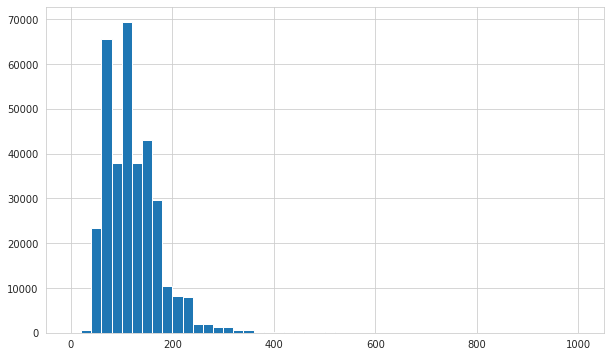

In [22]:
plt.figure(figsize=(10,6))
plt.hist(autos['Power'], bins=50, range = (0, 1000))
plt.show()

- Околонулевые значения убраны, распределение не пострадало
- Теперь проделаем то же самое с аномально высокими значениями мощности, для начала посмотрим на распределение в районе > 400 лс

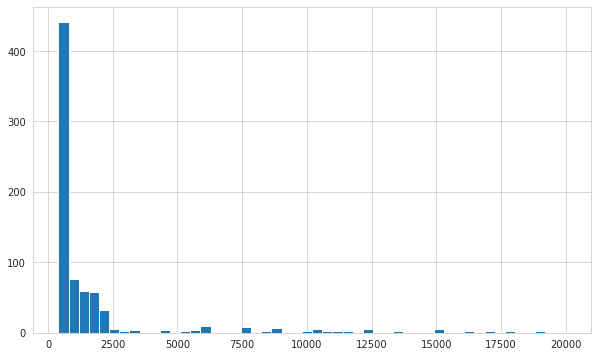

In [23]:
plt.figure(figsize=(10,6))
plt.hist(autos['Power'], bins=50, range = (400, autos['Power'].max()))
plt.show()

- Всевозможные современные популярные джипы и внедорожники могут иметь мощность в районе 500 лс, и вполне возможно и выше, но следуя в том числе данным, возьмем за отсечку для аномальным значений мощности значение 500 лс

In [24]:
high_power_index = autos[(autos['Power'] > 500)].index

autos.loc[high_power_index, 'Power'] = autos.groupby(['Brand', 'Model'])['Power'].transform('median')

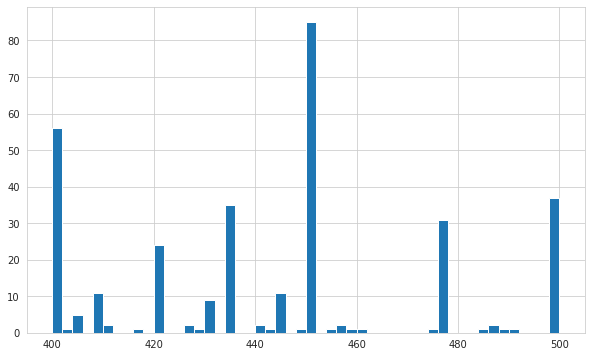

In [25]:
plt.figure(figsize=(10,6))
plt.hist(autos['Power'], bins=50, range = (400, autos['Power'].max()))
plt.show()

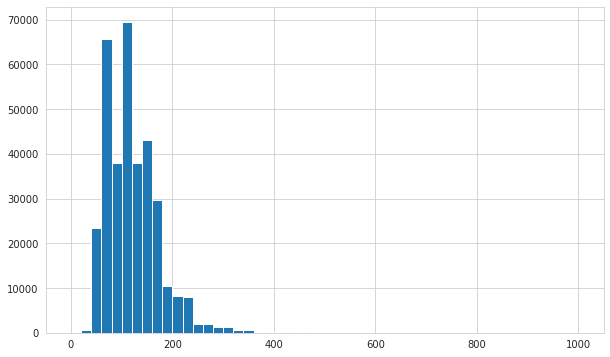

In [26]:
plt.figure(figsize=(10,6))
plt.hist(autos['Power'], bins=50, range = (0, 1000))
plt.show()

- Распределение по-прежнему в порядке

**Price**

- На последок разберемся с целевым признаком Price

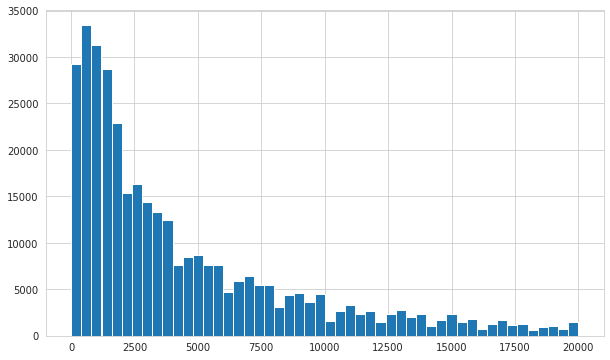

In [27]:
plt.figure(figsize=(10,6))
plt.hist(autos['Price'], bins=50)
plt.show()

- Большое количество нулевых значений
- Восстановим нулевые цены по медианным ценам таких же моделей с таким же пробегом

In [28]:
zero_price_index = autos[(autos['Price'] == 0)].index

autos.loc[zero_price_index, 'Price'] = autos.groupby(['Brand', 'Model', 'Kilometer'])['Price'].transform('median')

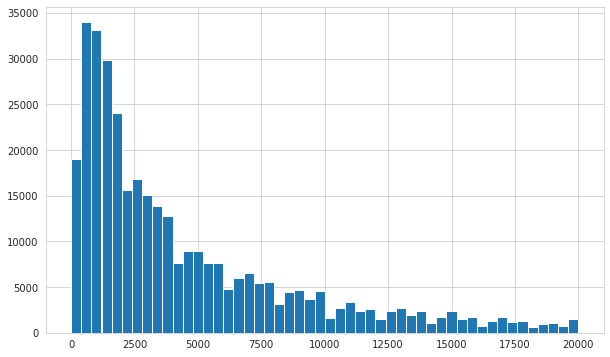

In [29]:
plt.figure(figsize=(10,6))
plt.hist(autos['Price'], bins=50)
plt.show()

- Ошибочные значения обработаны, теперь перейдем к пропускам

#### Обработка пропущенных значений

In [30]:
autos.isna().mean()

DateCrawled         0.000
Price               0.006
VehicleType         0.105
RegistrationYear    0.000
Gearbox             0.053
Power               0.017
Model               0.053
Kilometer           0.000
RegistrationMonth   0.000
FuelType            0.091
Brand               0.000
NotRepaired         0.198
DateCreated         0.000
PostalCode          0.000
LastSeen            0.000
dtype: float64

**NotRepaired**

- Начнем с NotRepaired
- Этот параметр наверняка связан с пробегом автомобиля
- Поэтому разделим пробег на 5 категорий и затем в соответствеии с категорией пробега будем будем присваивать пропускам медианые значения NotRepaired по этим категориям

In [31]:
autos['Kilometer_bins'] = pd.cut(autos['Kilometer'], bins=[4999, 34000, 63000, 92000, 121000, 150001], labels=[1, 2, 3, 4, 5])
autos['Kilometer_bins'].value_counts()

5    272321
3     29408
2     17992
1     14785
4     14306
Name: Kilometer_bins, dtype: int64

In [32]:
autos['NotRepaired'].value_counts()

no     244037
yes     35548
Name: NotRepaired, dtype: int64

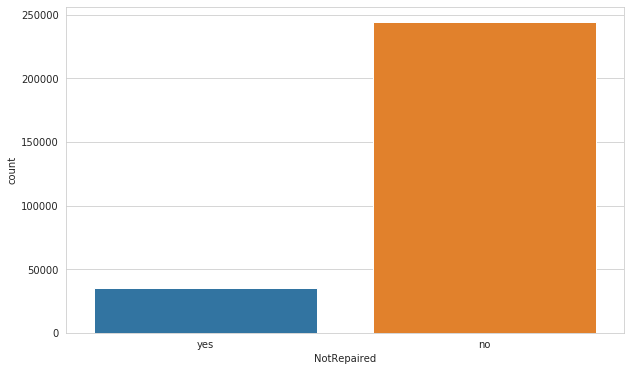

In [33]:
plt.figure(figsize=(10,6))
sns.countplot(autos['NotRepaired'], order=['yes', 'no'])
plt.show()

In [34]:
kilo_nan_groups = autos[autos['NotRepaired'].isna()]['Kilometer_bins'].value_counts().index

for i in kilo_nan_groups:
    group_mode = autos[autos['Kilometer_bins'] == i]['NotRepaired'].mode()
    autos.loc[(autos['NotRepaired'].isna()) & (autos['Kilometer_bins'] == i), 'NotRepaired'] = group_mode.values[0]

In [35]:
autos['NotRepaired'].value_counts()

no     313264
yes     35548
Name: NotRepaired, dtype: int64

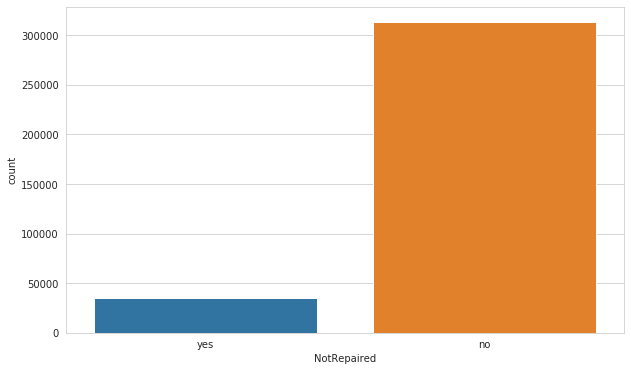

In [36]:
plt.figure(figsize=(10,6))
sns.countplot(autos['NotRepaired'], order=['yes', 'no'])
plt.show()

In [37]:
autos['NotRepaired'].isna().sum()

0

In [38]:
autos.isna().mean()

DateCrawled         0.000
Price               0.006
VehicleType         0.105
RegistrationYear    0.000
Gearbox             0.053
Power               0.017
Model               0.053
Kilometer           0.000
RegistrationMonth   0.000
FuelType            0.091
Brand               0.000
NotRepaired         0.000
DateCreated         0.000
PostalCode          0.000
LastSeen            0.000
Kilometer_bins      0.000
dtype: float64

**VehicleType**

- Теперь приступим к обработке пропусков в VehicleType
- Заменим пропуски в этом столбце на основе моды автомобилей такой же фирмы и модели

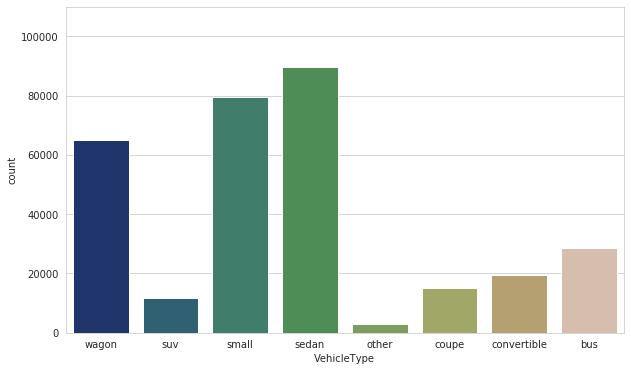

In [39]:
plt.figure(figsize=(10,6))
sns.countplot(autos['VehicleType'].sort_values(ascending=False), palette='gist_earth')
plt.ylim((0, 110000))
plt.show()

In [40]:
autos['VehicleType'].isna().sum()

36617

In [41]:
for i, _ in autos.groupby(['Brand', 'Model']):
    try:
        group_mode = autos[(autos['Brand'] == i[0]) & (autos['Model'] == i[1])]['VehicleType'].mode()
        autos.loc[(autos['VehicleType'].isna()) & 
                  (autos['Brand'] == i[0]) & 
                  (autos['Model'] == i[1]), 'VehicleType'] = group_mode.values[0]
    except IndexError:
        continue

In [42]:
autos['VehicleType'].isna().sum()

6472

In [43]:
autos['VehicleType'].isna().mean()

0.018554407531850968

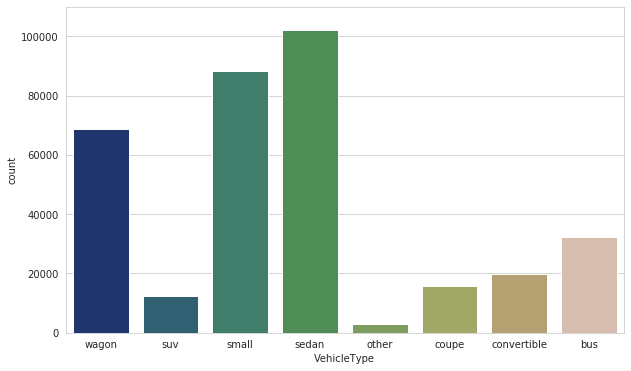

In [44]:
plt.figure(figsize=(10,6))
sns.countplot(autos['VehicleType'].sort_values(ascending=False), palette='gist_earth')
plt.ylim((0, 110000))
plt.show()

- У нас по-прежнему 1.9% пропусков - те авто, которые представлены в единственном экземпляре в датасете
- Для таких авто не получится восстановить восстановить их тип кузова по каким-то другим признакам
- Поэтому уберем оставшиеся строки с пропусками

In [45]:
autos.shape[0]

348812

In [46]:
autos['VehicleType'].isna().sum()

6472

In [47]:
autos.drop(autos[autos['VehicleType'].isna()].index, inplace=True)

In [48]:
autos.shape[0]

342340

In [49]:
autos.isna().mean()

DateCrawled         0.000
Price               0.003
VehicleType         0.000
RegistrationYear    0.000
Gearbox             0.046
Power               0.007
Model               0.035
Kilometer           0.000
RegistrationMonth   0.000
FuelType            0.081
Brand               0.000
NotRepaired         0.000
DateCreated         0.000
PostalCode          0.000
LastSeen            0.000
Kilometer_bins      0.000
dtype: float64

**FuelType**

- Обработаем теперь пропуски в столбце FuelType
- Первым делом хочется связать тип топлива с мощностью автомобиля, посмотрим как разные типы топлива распределены по мощности

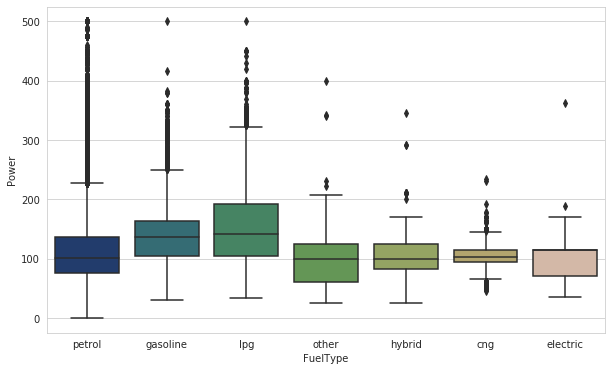

In [50]:
plt.figure(figsize=(10,6))
sns.boxplot(x='FuelType', y='Power', data=autos, palette='gist_earth')
plt.show()

- Довольно много пересечений, нужно взять другой признак
- Заменим пропуски в столбце с типом топлива модой по автомобилям того же бренда и модели

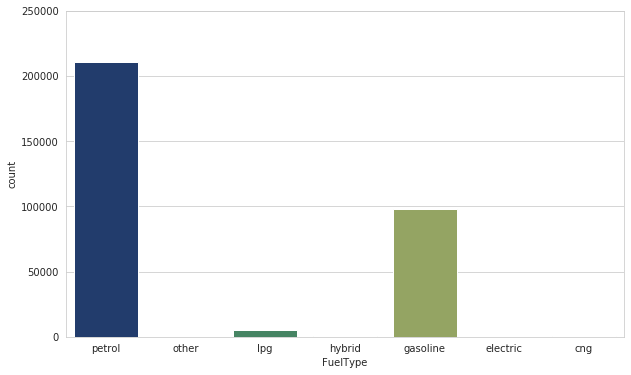

In [51]:
plt.figure(figsize=(10,6))
sns.countplot(autos['FuelType'].sort_values(ascending=False), palette='gist_earth')
plt.ylim((0, 250000))
plt.show()

In [52]:
autos['FuelType'].isna().sum()

27652

In [53]:
for i, _ in autos.groupby(['Brand', 'Model']):
    try:
        group_mode = autos[(autos['Brand'] == i[0]) & (autos['Model'] == i[1])]['FuelType'].mode()
        autos.loc[(autos['FuelType'].isna()) & 
                  (autos['Brand'] == i[0]) & 
                  (autos['Model'] == i[1]), 'FuelType'] = group_mode.values[0]
    except IndexError:
        continue

In [54]:
autos['FuelType'].isna().sum()

2689

In [55]:
autos['FuelType'].isna().mean()

0.007854764269439738

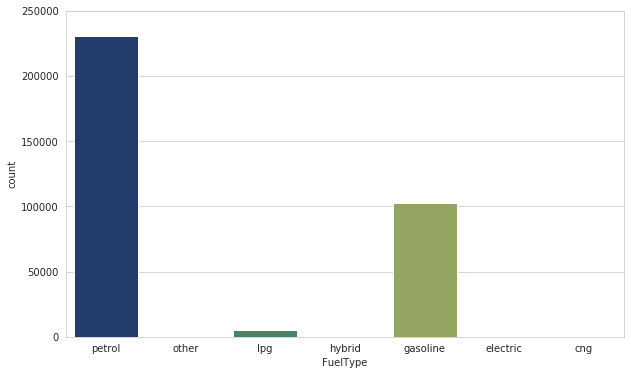

In [56]:
plt.figure(figsize=(10,6))
sns.countplot(autos['FuelType'].sort_values(ascending=False), palette='gist_earth')
plt.ylim((0, 250000))
plt.show()

- У нас по-прежнему 0.8% пропусков - те авто, которые представлены в единственном экземпляре в датасете
- Для таких авто не получится восстановить восстановить их тип топлива по каким-то другим признакам
- Поэтому уберем оставшиеся строки с пропусками

In [57]:
autos.shape[0]

342340

In [58]:
autos['FuelType'].isna().sum()

2689

In [59]:
autos.drop(autos[autos['FuelType'].isna()].index, inplace=True)

In [60]:
autos.shape[0]

339651

In [61]:
autos.isna().mean()

DateCrawled         0.000
Price               0.002
VehicleType         0.000
RegistrationYear    0.000
Gearbox             0.046
Power               0.005
Model               0.027
Kilometer           0.000
RegistrationMonth   0.000
FuelType            0.000
Brand               0.000
NotRepaired         0.000
DateCreated         0.000
PostalCode          0.000
LastSeen            0.000
Kilometer_bins      0.000
dtype: float64

**Gearbox**

- Перейдем к признаку Gearbox
- Тип коробки передач также можно восстановить по брэнду и модели автомобиля

In [62]:
autos['Gearbox'].value_counts()

manual    260016
auto       64169
Name: Gearbox, dtype: int64

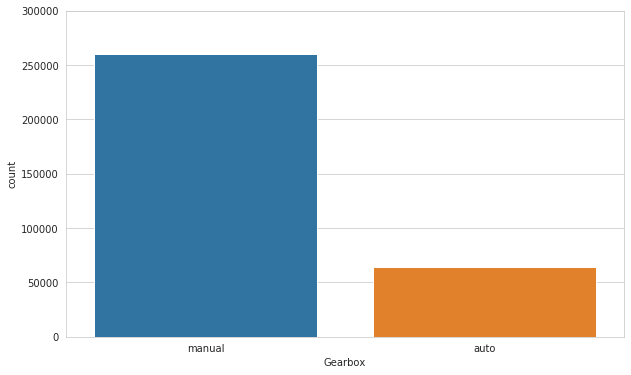

In [63]:
plt.figure(figsize=(10,6))
sns.countplot(autos['Gearbox'].sort_values(ascending=False))
plt.ylim((0, 300000))
plt.show()

In [64]:
autos['Gearbox'].isna().sum()

15466

In [65]:
for i, _ in autos.groupby(['Brand', 'Model']):
    try:
        group_mode = autos[(autos['Brand'] == i[0]) & (autos['Model'] == i[1])]['Gearbox'].mode()
        autos.loc[(autos['Gearbox'].isna()) & 
                  (autos['Brand'] == i[0]) & 
                  (autos['Model'] == i[1]), 'Gearbox'] = group_mode.values[0]
    except IndexError:
        continue

In [66]:
autos['Gearbox'].isna().sum()

520

In [67]:
autos['Gearbox'].isna().mean()

0.0015309832740077315

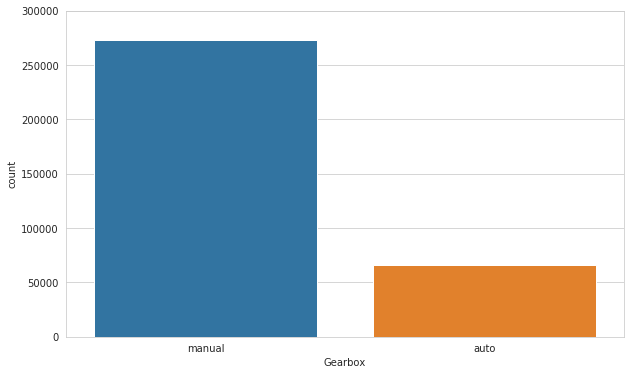

In [68]:
plt.figure(figsize=(10,6))
sns.countplot(autos['Gearbox'].sort_values(ascending=False))
plt.ylim((0, 300000))
plt.show()

- У нас по-прежнему 0.2% пропусков - те авто, которые представлены в единственном экземпляре в датасете
- Для таких авто не получится восстановить восстановить их тип коробки передач по каким-то другим признакам
- Поэтому уберем оставшиеся строки с пропусками

In [69]:
autos.shape[0]

339651

In [70]:
autos['Gearbox'].isna().sum()

520

In [71]:
autos.drop(autos[autos['Gearbox'].isna()].index, inplace=True)

In [72]:
autos.shape[0]

339131

In [73]:
autos.isna().mean()

DateCrawled         0.000
Price               0.002
VehicleType         0.000
RegistrationYear    0.000
Gearbox             0.000
Power               0.004
Model               0.026
Kilometer           0.000
RegistrationMonth   0.000
FuelType            0.000
Brand               0.000
NotRepaired         0.000
DateCreated         0.000
PostalCode          0.000
LastSeen            0.000
Kilometer_bins      0.000
dtype: float64

**Model**

- Как правило, модель определяется большим количеством параметров и те, что есть в нашем датасете, могут пересекатьс для разных моделей
- Поэтому дабы не допустить ошибок в определении модели, т.к. этот параметр довольно важен в определении стоимости, аккуратно уберем пропуски в столбце Model, ведь их всего 2.6%

In [74]:
autos.shape[0]

339131

In [75]:
autos['Model'].isna().sum()

8783

In [76]:
autos.drop(autos[autos['Model'].isna()].index, inplace=True)

In [77]:
autos.shape[0]

330348

In [78]:
autos.isna().mean()

DateCrawled         0.000
Price               0.000
VehicleType         0.000
RegistrationYear    0.000
Gearbox             0.000
Power               0.000
Model               0.000
Kilometer           0.000
RegistrationMonth   0.000
FuelType            0.000
Brand               0.000
NotRepaired         0.000
DateCreated         0.000
PostalCode          0.000
LastSeen            0.000
Kilometer_bins      0.000
dtype: float64

In [79]:
print('{:.2%} of data is eliminated after missing values handling'.format(1-330348/354369))

6.78% of data is eliminated after missing values handling


**Вывод**

- Категориальные признаки проверены на предмет наличия ошибочных или дублирующих значений
- Обработаны ошибочные значения количественных признаков
- Для всех признаков обработаны пропущенные значения
- В итоге во время обработки проблемных и пропущенных значений было потеряно около 6.78% исходных данных, что вполне приемлемый результат

### Преобразование типов

- Преобразуем столбцы с датой и временем в формат datetime

In [80]:
autos.columns

Index(['DateCrawled', 'Price', 'VehicleType', 'RegistrationYear', 'Gearbox',
       'Power', 'Model', 'Kilometer', 'RegistrationMonth', 'FuelType', 'Brand',
       'NotRepaired', 'DateCreated', 'PostalCode', 'LastSeen',
       'Kilometer_bins'],
      dtype='object')

In [81]:
autos[['DateCrawled', 'DateCreated', 'LastSeen']].head(10)

,DateCrawled,DateCreated,LastSeen
0,2016-03-24 11:52:17,2016-03-24 00:00:00,2016-04-07 03:16:57
2,2016-03-14 12:52:21,2016-03-14 00:00:00,2016-04-05 12:47:46
3,2016-03-17 16:54:04,2016-03-17 00:00:00,2016-03-17 17:40:17
4,2016-03-31 17:25:20,2016-03-31 00:00:00,2016-04-06 10:17:21
5,2016-04-04 17:36:23,2016-04-04 00:00:00,2016-04-06 19:17:07
6,2016-04-01 20:48:51,2016-04-01 00:00:00,2016-04-05 18:18:39
8,2016-04-04 23:42:13,2016-04-04 00:00:00,2016-04-04 23:42:13
9,2016-03-17 10:53:50,2016-03-17 00:00:00,2016-03-31 17:17:06
10,2016-03-26 19:54:18,2016-03-26 00:00:00,2016-04-06 10:45:34
11,2016-04-07 10:06:22,2016-04-07 00:00:00,2016-04-07 10:25:17


In [82]:
autos['DateCrawled'] = pd.to_datetime(autos['DateCrawled'], format='%Y-%m-%dT%H:%M:%S')
autos['DateCreated'] = pd.to_datetime(autos['DateCreated'], format='%Y-%m-%dT%H:%M:%S')
autos['LastSeen'] = pd.to_datetime(autos['LastSeen'], format='%Y-%m-%dT%H:%M:%S')

In [83]:
autos[['DateCrawled', 'DateCreated', 'LastSeen']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 330348 entries, 0 to 354368
Data columns (total 3 columns):
DateCrawled    330348 non-null datetime64[ns]
DateCreated    330348 non-null datetime64[ns]
LastSeen       330348 non-null datetime64[ns]
dtypes: datetime64[ns](3)
memory usage: 10.1 MB


### Исследовательский анализ данных

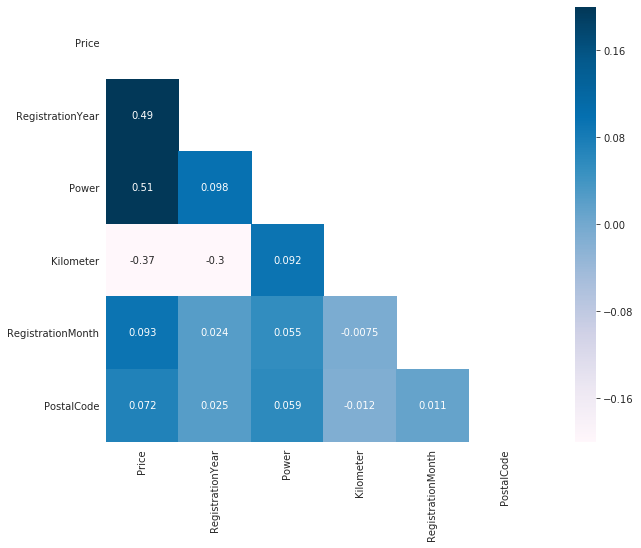

In [84]:
mask = np.triu(autos.corr())
fig = plt.subplots(figsize=(12, 8))
sns.heatmap(autos.corr(), 
            annot=True, 
            cmap= 'PuBu', 
            square=True, 
            mask=mask, 
            vmin=-0.2, 
            vmax=0.2
           )
plt.show()

### Подготовка признаков

In [85]:
autos.columns

Index(['DateCrawled', 'Price', 'VehicleType', 'RegistrationYear', 'Gearbox',
       'Power', 'Model', 'Kilometer', 'RegistrationMonth', 'FuelType', 'Brand',
       'NotRepaired', 'DateCreated', 'PostalCode', 'LastSeen',
       'Kilometer_bins'],
      dtype='object')

**Удаление малоинформативных признаков**

- Вместо дат посчитаем количество секунд между моментом, когда была скачена анкета (DateCrawled) и последней активностью пользователя (LastSeen), а дата заполнения анкеты (DateCreated) по сути присутствует в дате скачивания, поэтому дату заполнения можно убрать

In [86]:
autos[['DateCrawled', 'DateCreated', 'LastSeen']].sample(5)

,DateCrawled,DateCreated,LastSeen
141119,2016-03-21 19:37:45,2016-03-21,2016-03-21 19:37:45
50826,2016-03-17 21:44:20,2016-03-17,2016-04-07 11:16:29
241318,2016-03-21 18:49:27,2016-03-21,2016-04-06 21:15:38
102810,2016-03-22 18:39:14,2016-03-22,2016-04-02 12:18:12
174636,2016-03-12 17:39:40,2016-03-12,2016-03-24 16:44:27


In [87]:
autos['Ad_awaiting'] = (autos['LastSeen'] - autos['DateCrawled']).dt.seconds

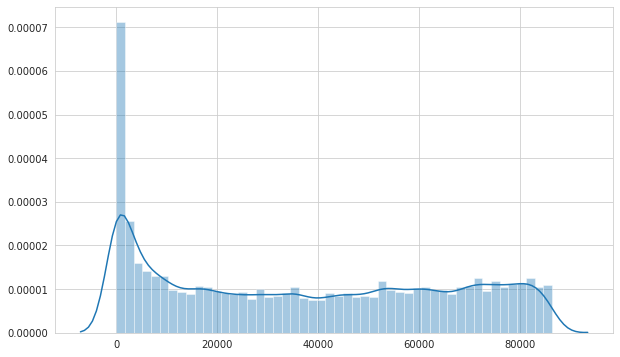

In [88]:
plt.figure(figsize=(10,6))
sns.distplot(autos[['Ad_awaiting']])
plt.show()

In [89]:
autos.shape

(330348, 17)

In [90]:
autos.drop(columns=['DateCrawled', 'DateCreated', 'LastSeen'], inplace=True)

In [91]:
autos.shape

(330348, 14)

- Кроме того, нам вряд ли поможет индекс местоположения автомобиля (PostalCode), кроме того нам не нужно точность до месяца в плане того, когда был зарегистрирован авто, поэтому мы также убираем признак RegistrationMonth
- Т.к. нам не сильно важна абсолютно точная цифра пробега, а скорее разделение пробега по категориям, оставим признак Kilometer_bins, созданный ранее, где пробег разбит на 5 категорий с шагом 29000 км

In [92]:
autos.shape

(330348, 14)

In [93]:
autos.drop(columns=['PostalCode', 'RegistrationMonth', 'Kilometer'], inplace=True)

In [94]:
autos.shape

(330348, 11)

In [95]:
autos.columns

Index(['Price', 'VehicleType', 'RegistrationYear', 'Gearbox', 'Power', 'Model',
       'FuelType', 'Brand', 'NotRepaired', 'Kilometer_bins', 'Ad_awaiting'],
      dtype='object')

**Кодирование категориальных признаков**

- Бинарные категориальные переменные закодируем через 0 и 1
- Бинарные переменные в датасете: Gearbox и NotRepaired

In [96]:
autos['Gearbox'].unique()

array(['manual', 'auto'], dtype=object)

In [97]:
autos['Gearbox'] = autos['Gearbox'].map({'manual': 0, 'auto': 1})

In [98]:
autos['Gearbox'].unique()

array([0, 1])

In [99]:
autos['NotRepaired'].unique()

array(['no', 'yes'], dtype=object)

In [100]:
autos['NotRepaired'] = autos['NotRepaired'].map({'no': 0, 'yes': 1})

In [101]:
autos['NotRepaired'].unique()

array([0, 1])

- Закодируем остальные категориальные переменные с помощью Ordinal Encoding

In [102]:
X = autos.drop('Price', axis=1)
y = autos[['Price']]

In [103]:
autos.shape

(330348, 11)

In [104]:
X.shape

(330348, 10)

In [105]:
y.shape

(330348, 1)

In [106]:
# X = pd.get_dummies(X, drop_first=True)

In [107]:
oe = OrdinalEncoder()
X = oe.fit_transform(X)

In [108]:
X.shape

(330348, 10)

### Создание обучающей и тестовой выборок

- Разделим данные на обучающую (75%) и тестовую выборки (25%)

In [109]:
seed = 24
cv_k = 5

In [110]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.25, 
                                                    random_state=seed
                                                   )

## Обучение моделей

- Напишем функции для обучения, подбора гиперпараметров модели с помощью RandomizedSearchCV или GridSearchCV и расчет RMSE и R2 по тестовой выборке
- Отдельно напишем функцию для обучения линейной регрессии, т.к. для ее реализации в sklearn нет гиперпараметров. Будем использовать кросс-валидацию для оценки качества модели

In [111]:
def reg_gs_score(model, x_train, y_train, x_test, y_test, cv_k, hp_space, seed=24, scale=False, randomcv=False, n=10):
    """
    scores the regression model using RandomizedSearchCV or GridSearchCV, RMSE and R squared
    
    params:
    - model - the regression model
    - x_train - training features
    - y_train - training labels
    - x_test - test features
    - y_test - test labels
    - cv_k - k for k-fold cross-validation in RandomizedSearchCV or GridSearchCV
    - hp_space - hyperparameter space
    - seed - seed
    - scale=False - True if the model needs to be scaled (StandardScaler applied)
    - randomcv=False - True if RandomizedSearchCV is prefered over GridSearchCV
    - n - n_iter parameter for RandomizedSearchCV
    
    returns:
    - rmse_test - RMSE test
    - r2_test - r squared on the test set
    - rmse_val - RMSE validation
    - reg_gs_best_params - model's best parameters from RandomizedSearchCV based on final sMAPE
    - reg_gs_best_model - best model from RandomizedSearchCV based on final sMAPE
    """
    if scale:
        scaler = StandardScaler()
        reg = model
        
        steps = [('scaler', scaler), ('reg', reg)]
        pipeline = Pipeline(steps)
        
        new_hp_space = {}
        for key, val in hp_space.items():
            new_hp_space['reg__'+key] = val
            
        hp_space = new_hp_space.copy()
    else:
        pipeline = model
        
    if randomcv:
        reg_gs = RandomizedSearchCV(pipeline, 
                                    hp_space, 
                                    cv=cv_k, 
                                    scoring='neg_mean_squared_error',
                                    random_state=seed,
                                    verbose=1,
                                    n_iter=n
                                   )
    else:
        reg_gs = GridSearchCV(pipeline, 
                              hp_space, 
                              cv=cv_k, 
                              scoring='neg_mean_squared_error',
                              verbose=1
                             )
    
    reg_gs.fit(x_train, y_train)
    
    reg_gs_best_params = reg_gs.best_params_
    reg_gs_best_model = reg_gs.best_estimator_
    rmse_val = np.sqrt(-reg_gs.best_score_).round(3)
    
    if scale:
        reg_gs_best_params_out_of_pipe = {}
        for key, val in reg_gs_best_params.items():
            reg_gs_best_params_out_of_pipe[key[5:]] = val
    else:
        reg_gs_best_params_out_of_pipe = reg_gs_best_params.copy()
    
    y_pred = reg_gs_best_model.predict(x_test)
    rmse_test = np.sqrt(mean_squared_error(y_test, y_pred)).round(3)
    r2_test = r2_score(y_test, y_pred).round(3)
    
    return rmse_test, r2_test, rmse_val, reg_gs_best_params, reg_gs_best_params_out_of_pipe, reg_gs_best_model

In [112]:
def bm_linreg_cv_score(x_train, y_train, x_test, y_test, cv_k):
    """
    scores sklearn's LinearRegression model using cross_validate on neg_mean_squared_error score function
    
    params:
    - x_train - training features
    - y_train - training labels
    - x_test - test features
    - y_test - test labels
    - cv_k - k for k-fold cross-validation
    
    returns:
    - rmse_test - RMSE test
    - rmse_val - RMSE validation
    - rmse_train - RMSE train
    """
    scaler = StandardScaler()
    linreg = LinearRegression()

    steps = [('scaler', scaler), ('linreg', linreg)]
    pipeline = Pipeline(steps)

    train_val_score_linreg_1 = cross_validate(pipeline,
                                              x_train, 
                                              y_train, 
                                              cv=cv_k, 
                                              scoring='neg_mean_squared_error',
                                              return_train_score=True
                                              )
    
    pipeline.fit(x_train, y_train)
    y_pred = pipeline.predict(x_test)

    rmse_test = np.sqrt(mean_squared_error(y_test, y_pred)).round(3)
    rmse_val = np.sqrt(-train_val_score_linreg_1['test_score'].mean()).round(3)
    rmse_train = np.sqrt(-train_val_score_linreg_1['train_score'].mean()).round(3)
    
    return rmse_test, rmse_val, rmse_train

- Обучим следующие модели:
    - LinearRegression
    - ElasticNet
    - RandomForestRegressor
    - LightGBM Regressor
- Адекватность полученных моделей проверим с помощью DummyRegressor
- Помним, что помимо качества предсказаний модели, нам также важно время обучения-предсказания модели

### LinearRegression

In [113]:
%%time
rmse_test_bm1, rmse_val_bm1, rmse_train_bm1 = bm_linreg_cv_score(X_train, 
                                                                 y_train, 
                                                                 X_test, 
                                                                 y_test, 
                                                                 5
                                                                )

CPU times: user 1.78 s, sys: 1.05 s, total: 2.84 s
Wall time: 2.78 s


In [114]:
print(f'RMSE test: {rmse_test_bm1}')
print(f'RMSE valid: {rmse_val_bm1}')
print(f'RMSE train: {rmse_train_bm1}')

RMSE test: 2954.813
RMSE valid: 2939.835
RMSE train: 2939.658


In [115]:
%%time
linreg = LinearRegression()
linreg.fit(X_train, y_train)

CPU times: user 105 ms, sys: 48.2 ms, total: 154 ms
Wall time: 115 ms


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [116]:
%%time
y_pred_linreg = linreg.predict(X_test)

CPU times: user 16.5 ms, sys: 19.7 ms, total: 36.1 ms
Wall time: 6.14 ms


### ElasticNet

In [117]:
%%time
hs_en = {'alpha': np.linspace(0.01, 0.1, 9),
         'l1_ratio': np.linspace(0, 1, 10)
        }

en_rmse_test, en_r2_test, en_rmse_val, en_best_params, _, en_best_model = reg_gs_score(ElasticNet(random_state=24), 
                                                                                       X_train, 
                                                                                       y_train, 
                                                                                       X_test, 
                                                                                       y_test, 
                                                                                       5, 
                                                                                       hs_en, 
                                                                                       seed=24, 
                                                                                       scale=True,
                                                                                       randomcv=True,
                                                                                       n=5
                                                                                      )


Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:  2.3min finished


CPU times: user 1min 32s, sys: 42.9 s, total: 2min 15s
Wall time: 2min 16s


In [118]:
print(f'ElasticNet best params: {en_best_params}')
print(f'RMSE test: {en_rmse_test}')
print(f'RMSE valid: {en_rmse_val}')
print(f'R2 test: {en_r2_test}')

ElasticNet best params: {'reg__l1_ratio': 0.8888888888888888, 'reg__alpha': 0.05500000000000001}
RMSE test: 2954.891
RMSE valid: 2939.891
R2 test: 0.571


In [119]:
%%time
elnet = ElasticNet(l1_ratio=0.8888888888888888, alpha=0.05500000000000001)
elnet.fit(X_train, y_train)

CPU times: user 198 ms, sys: 91.5 ms, total: 289 ms
Wall time: 281 ms


ElasticNet(alpha=0.05500000000000001, copy_X=True, fit_intercept=True,
           l1_ratio=0.8888888888888888, max_iter=1000, normalize=False,
           positive=False, precompute=False, random_state=None,
           selection='cyclic', tol=0.0001, warm_start=False)

In [120]:
%%time
y_pred_elnet = elnet.predict(X_test)

CPU times: user 0 ns, sys: 15.4 ms, total: 15.4 ms
Wall time: 2.45 ms


### RandomForestRegressor

In [121]:
%%time
hs_rf = {'max_depth': np.arange(4, 10),
         'max_features': np.arange(3, 11, 2)
        }

rf_rmse_test, rf_r2_test, rf_rmse_val, rf_best_params, _, rf_best_model = reg_gs_score(RandomForestRegressor(random_state=24,
                                                                                                             n_jobs=-1
                                                                                                            ), 
                                                                                       X_train, 
                                                                                       y_train, 
                                                                                       X_test, 
                                                                                       y_test, 
                                                                                       5, 
                                                                                       hs_rf, 
                                                                                       seed=24, 
                                                                                       scale=False,
                                                                                       #randomcv=True,
                                                                                       n=10
                                                                                      )

Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:  4.2min finished


CPU times: user 4min 16s, sys: 0 ns, total: 4min 16s
Wall time: 4min 19s


In [122]:
print(f'RandomForest best params: {rf_best_params}')
print(f'RMSE test: {rf_rmse_test}')
print(f'RMSE valid: {rf_rmse_val}')
print(f'R2 test: {rf_r2_test}')

RandomForest best params: {'max_depth': 9, 'max_features': 7}
RMSE test: 1945.989
RMSE valid: 1944.415
R2 test: 0.814


In [123]:
%%time
ranfor = RandomForestRegressor(random_state=24, max_depth=9, max_features=7, n_jobs=-1)
ranfor.fit(X_train, y_train)

CPU times: user 3.95 s, sys: 0 ns, total: 3.95 s
Wall time: 3.98 s


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=9,
                      max_features=7, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
                      oob_score=False, random_state=24, verbose=0,
                      warm_start=False)

In [124]:
%%time
y_pred_ranfor = ranfor.predict(X_test)

CPU times: user 83.3 ms, sys: 0 ns, total: 83.3 ms
Wall time: 97.5 ms


### LightGBM Regressor

In [125]:
%%time
hs_gb = {'num_iterations': [200],
         'max_depth': [7, 10]
        }

gb_rmse_test, gb_r2_test, gb_rmse_val, gb_best_params, _, gb_best_model = reg_gs_score(lgb.LGBMRegressor(categorical_feature = [1,5,6,7,9]), 
                                                                                       X_train, 
                                                                                       y_train, 
                                                                                       X_test, 
                                                                                       y_test, 
                                                                                       cv_k, 
                                                                                       hs_gb, 
                                                                                       seed=24, 
                                                                                       scale=False, 
                                                                                       randomcv=False, 
                                                                                       n=10
                                                                                      )

Fitting 5 folds for each of 2 candidates, totalling 10 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:  6.0min finished


CPU times: user 6min 37s, sys: 0 ns, total: 6min 37s
Wall time: 6min 43s


In [126]:
print(f'GradientBoosting best params: {gb_best_params}')
print(f'RMSE test: {gb_rmse_test}')
print(f'RMSE valid: {gb_rmse_val}')
print(f'R2 test: {gb_r2_test}')

GradientBoosting best params: {'max_depth': 10, 'num_iterations': 200}
RMSE test: 1667.924
RMSE valid: 1676.477
R2 test: 0.863


In [127]:
%%time
gradboost = lgb.LGBMRegressor(categorical_feature = [1,5,6,7,9], max_depth=10, num_iterations=200)
gradboost.fit(X_train, y_train)

CPU times: user 46.7 s, sys: 0 ns, total: 46.7 s
Wall time: 47.8 s


LGBMRegressor(boosting_type='gbdt', categorical_feature=[1, 5, 6, 7, 9],
              class_weight=None, colsample_bytree=1.0, importance_type='split',
              learning_rate=0.1, max_depth=10, min_child_samples=20,
              min_child_weight=0.001, min_split_gain=0.0, n_estimators=100,
              n_jobs=-1, num_iterations=200, num_leaves=31, objective=None,
              random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [128]:
%%time
y_pred_gradboost = gradboost.predict(X_test)

CPU times: user 3.45 s, sys: 0 ns, total: 3.45 s
Wall time: 3.49 s


### DummyRegressor

In [129]:
%%time
dummy_reg = DummyRegressor(strategy="median")
dummy_reg.fit(X_train, y_train)

CPU times: user 7.11 ms, sys: 0 ns, total: 7.11 ms
Wall time: 5.96 ms


DummyRegressor(constant=None, quantile=None, strategy='median')

In [130]:
%%time
y_pred_dummy = dummy_reg.predict(X_test)

CPU times: user 1.46 ms, sys: 0 ns, total: 1.46 ms
Wall time: 719 µs


In [131]:
%%time
rmse_dummy = mean_squared_error(y_test, y_pred_dummy).round(3)
rmse_dummy

CPU times: user 2.62 ms, sys: 0 ns, total: 2.62 ms
Wall time: 2.26 ms


23163804.91

**Вывод**

- Лучший результат по качеству показала модель LightGBM, но в то же время это самая медленная модель
- Самая быстрая модель - LinearRegression - оказалась практически самой худшей по качеству, причем качество значительно уступает качеству модели LightGBM

## Анализ моделей

In [137]:
results = pd.DataFrame({'rmse_test' : [rmse_test_bm1, en_rmse_test, rf_rmse_test, gb_rmse_test, rmse_dummy], 
                        'rmse_val': [rmse_val_bm1, en_rmse_val, rf_rmse_val, gb_rmse_val, rmse_dummy],
                        'fit_time_ms': [115, 281, 3980, 47800, 719],
                        'predict_time_ms': [6, 2, 98, 3490, 2]
                       },
                       index=['LinearRegression', 'ElasticNet', 'RandomForestRegressor', 'LightGBMRegressor', 'DummyRegressor']
                      )
results['total_time_ms'] = results['fit_time_ms'] + results['predict_time_ms']
results.sort_values(['rmse_test'])

,rmse_test,rmse_val,fit_time_ms,predict_time_ms,total_time_ms
LightGBMRegressor,1667.924,1676.477,47800,3490,51290
RandomForestRegressor,1945.989,1944.415,3980,98,4078
LinearRegression,2954.813,2939.835,115,6,121
ElasticNet,2954.891,2939.891,281,2,283
DummyRegressor,23163804.910,23163804.910,719,2,721


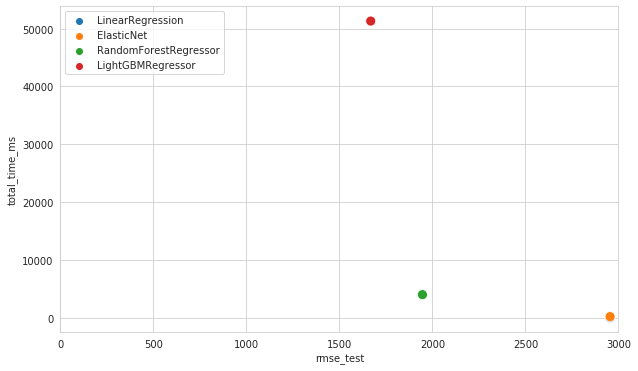

In [138]:
plt.figure(figsize=(10,6))
sns.scatterplot(results['rmse_test'].drop('DummyRegressor'), 
                results['total_time_ms'].drop('DummyRegressor'), 
                hue=results.drop('DummyRegressor').index,
                s=100
               )
plt.xlim((0, 3000))
plt.legend(loc=2)
plt.show()

- Несмотря на прирост в качестве модели, LightGBM в 12 раз дольше обучается и в 35 дольше делает предсказания, по сравнению с RandomForest
- Качество моделей LinearRegression и ElasticNet значительно хуже, несмотря на гораздо более быстрое обучение и предсказания

- А теперь на примерах RandomForest, LightGBM и ElasticNet посмотрим насколько разные признаки важны в разных моделях

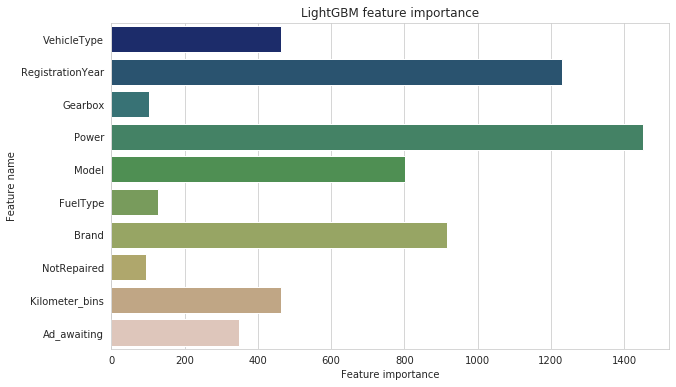

In [139]:
feat_importances_gb = pd.Series(gb_best_model.feature_importances_, index=autos.drop('Price', axis=1).columns)

plt.figure(figsize=(10, 6))
sns.barplot(feat_importances_gb, feat_importances_gb.index, palette='gist_earth')
plt.xlabel('Feature importance')
plt.ylabel('Feature name')
plt.title('LightGBM feature importance')
plt.show()

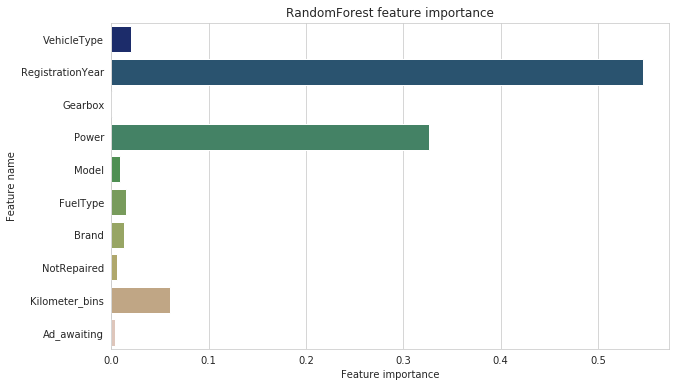

In [140]:
feat_importances_rf = pd.Series(rf_best_model.feature_importances_, index=autos.drop('Price', axis=1).columns)

plt.figure(figsize=(10, 6))
sns.barplot(feat_importances_rf, feat_importances_rf.index, palette='gist_earth')
plt.xlabel('Feature importance')
plt.ylabel('Feature name')
plt.title('RandomForest feature importance')
plt.show()

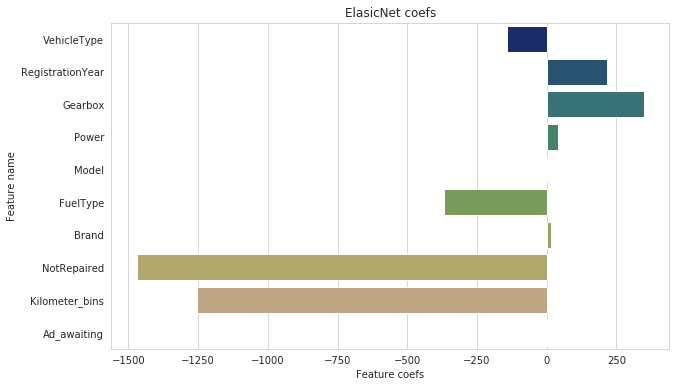

In [141]:
feat_coefs_en = pd.Series(elnet.coef_, index=autos.drop('Price', axis=1).columns)

plt.figure(figsize=(10, 6))
sns.barplot(feat_coefs_en, feat_coefs_en.index, palette='gist_earth')
plt.xlabel('Feature coefs')
plt.ylabel('Feature name')
plt.title('ElasicNet coefs')
plt.show()

- Очень хорошо видно, как LightGBM вместе с RandomForest в качестве самых важных признаков цены автомобиля представили признаки RegistrationYear и Power
- Помимо этого, LightGBM довольно точно выделил важными такие признаки, как Brand и Model, в отличие от RandomForest
- Видна причина неудачи ElasticNet: для наиболее важных признаков, которые описаны выше моделями LightGBM и RandomForest, ElasticNet присвоила практически самые низкие по модулю коэффициенты, что означает наименьшую значимость этих признаков - все наоборот! Среди наиболее значимых выбраны далеко не самые значимые в реальной жизни.

**Вывод**

- Несмотря на худший результат по времени обучения-предсказания, **финальной моделью выбирается LightGBM** из-за значительно лучшего качества предсказаний
- Время обучения-предсказания можно сократить засчет менее подробного подбора гиперпараметров, при этом качество модели пострадает не сильно и все равно будет заметно выше качества остальных моделей